In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

from snvmodels.snv import SNv
from snvmodels.solarndists import SolarNDist
from detectors.nai import DAMA
from veldists import VelDist
from constants import *

In [2]:
## Step 1
Det = DAMA()
Model = SNv()

In [3]:
## Supernova neutrino flux
Ev = np.logspace(1,6,500) # Supernova neutrino energy, units of [keV]
Ev_eV = Ev*keV
flux_electron_nu = Model.Flux_neutrino( Ev_eV, 'e')*keV #[/cm2/keV]
flux_electron_antinu = Model.Flux_neutrino( Ev_eV, 'ea')*keV #[/cm2/keV]
flux_x = Model.Flux_neutrino( Ev_eV, 'x')*keV #[/cm2/keV]
flux_total = flux_electron_nu + flux_electron_antinu + flux_x

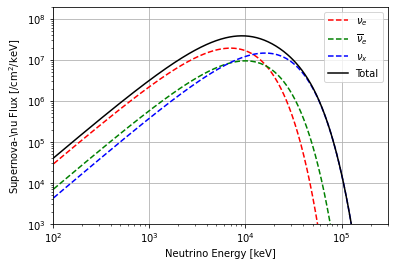

In [4]:
## Supernova neutrino flux
plt.plot(Ev, flux_electron_nu, label=r'$\nu_{e}$', color = 'r', linestyle='--')
plt.plot(Ev, flux_electron_antinu, label=r'$\overline{\nu}_e$', color = 'g', linestyle ='--')
plt.plot(Ev, flux_x, label=r'$\nu_x$', color = 'b', linestyle='--')
plt.plot(Ev, flux_total, label=r'Total', color = 'k', linestyle='-')
#plt.plot(E,[Det.dRdE(DMRate,e) for e in E])
#plt.plot(E,[Det.dRdE(DMRate2,e) for e in E])
plt.legend()
plt.xlabel(r"Neutrino Energy [keV]")
plt.ylabel(r"Supernova-\nu Flux [/cm$^2$/keV]")
plt.xlim(1e2,3e5)
plt.ylim(1e3, 2e8)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

Text(0, 0.5, 'Counts [/kg/keV]')

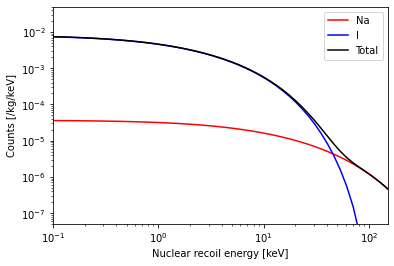

In [5]:
ER = np.logspace(-3,3,100) # Nuclear recoil energy, units of keV
ER_eV = ER*keV
T=Det.Nuclei()
plt.plot(ER,[Model.dRdER(T[0],Ev_eV,ERi)*keV*T[0].mT()/Det.DetMass() for ERi in ER_eV],label='Na',color='r')
plt.plot(ER,[Model.dRdER(T[1],Ev_eV,ERi)*keV*T[1].mT()/Det.DetMass() for ERi in ER_eV],label='I',color='blue')
plt.plot(ER,[Model.dRdER(T[0],Ev_eV,ERi)*keV*T[0].mT()/Det.DetMass()+Model.dRdER(T[1],Ev_eV,ERi)*keV*T[1].mT()/Det.DetMass() for ERi in ER_eV],label='Total',color='black')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(1e-1,1.5e2)
plt.ylim(5e-8, 5e-2)
plt.xlabel(r"Nuclear recoil energy [keV]")
plt.ylabel(r"Counts [/kg/keV]")

Text(0, 0.5, 'Counts [/kg/keV]')

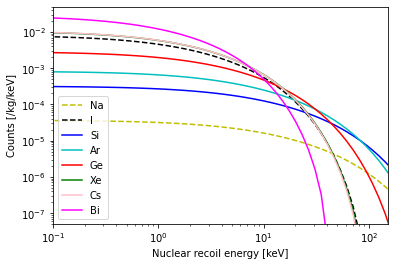

In [6]:
from targets.ar36 import Ar36
from targets.ar38 import Ar38
from targets.ar40 import Ar40
from targets.ge70 import Ge70
from targets.ge72 import Ge72
from targets.ge73 import Ge73
from targets.ge74 import Ge74
from targets.ge76 import Ge76
from targets.si28 import Si28
from targets.xe124 import Xe124
from targets.xe126 import Xe126
from targets.xe128 import Xe128
from targets.xe129 import Xe129
from targets.xe130 import Xe130
from targets.xe131 import Xe131
from targets.xe132 import Xe132
from targets.xe134 import Xe134
from targets.xe136 import Xe136
from targets.cs133 import Cs133
from targets.bi209 import Bi209

ER = np.logspace(-3,3,100) # Nuclear recoil energy, units of keV
ER_eV = ER*keV

plt.plot(ER,[Model.dRdER(T[0],Ev_eV,ERi)*keV*T[0].mT()/Det.DetMass() for ERi in ER_eV],label='Na',color='y',linestyle='--')
plt.plot(ER,[Model.dRdER(T[1],Ev_eV,ERi)*keV*T[1].mT()/Det.DetMass() for ERi in ER_eV],label='I',color='k',linestyle='--')

T_Si=Si28()
plt.plot(ER,[Model.dRdER(T_Si,Ev_eV,ERi)*keV for ERi in ER_eV],label='Si',linestyle='-',color='b')


ls_Ar=[Ar36(),Ar38(),Ar40()]
abundance_Ar=[0.00334,0.000630,0.996]
Ar=np.zeros(100)
for i in range(len(ls_Ar)):
    Ar+=np.array([Model.dRdER(ls_Ar[i],Ev_eV,ERi)*keV for ERi in ER_eV])*abundance_Ar[i]
plt.plot(ER,Ar,label='Ar',linestyle='-',color='c')


ls_Ge=[Ge70(),Ge72(),Ge73(),Ge74(),Ge76()]
abundance_Ge=[0.205,0.274,0.0776,0.365,0.0775]
Ge=np.zeros(100)
for i in range(len(ls_Ge)):
    Ge+=np.array([Model.dRdER(ls_Ge[i],Ev_eV,ERi)*keV for ERi in ER_eV])*abundance_Ge[i]
plt.plot(ER,Ge,label='Ge',linestyle='-',color='r')


ls_Xe=[Xe124(),Xe126(),Xe128(),Xe129(),Xe130(),Xe131(),Xe132(),Xe134(),Xe136()]
abundance_Xe=[0.00095,0.000890,0.0191,0.264,0.0407,0.212,0.269,0.104,0.0886]
Xe=np.zeros(100)
for i in range(len(ls_Xe)):
    Xe+=np.array([Model.dRdER(ls_Xe[i],Ev_eV,ERi)*keV for ERi in ER_eV])*abundance_Xe[i]
plt.plot(ER,Xe,label='Xe',linestyle='-',color='g')

T_cs=Cs133()
plt.plot(ER,[Model.dRdER(T_cs,Ev_eV,ERi)*keV for ERi in ER_eV],label='Cs',linestyle='-',color='pink')

T_cs=Bi209()
plt.plot(ER,[Model.dRdER(T_cs,Ev_eV,ERi)*keV for ERi in ER_eV],label='Bi',linestyle='-',color='magenta')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(1e-1,1.5e2)
plt.ylim(5e-8, 5e-2)
plt.xlabel(r"Nuclear recoil energy [keV]")
plt.ylabel(r"Counts [/kg/keV]")

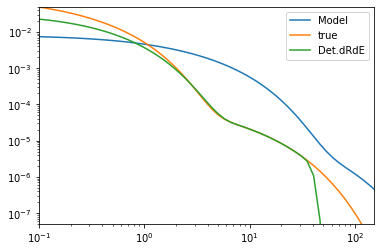

In [7]:
## With DAMA detector response
def DMRate(T,ER):
    ## DM rate defined with SHM
    return Model.dRdER(T,Ev_eV,ER)
## Supernova neutrino flux
plt.plot(ER,[Model.dRdER(T[0],Ev_eV,ERi)*T[0].mT()/Det.DetMass()*keV+Model.dRdER(T[1],Ev_eV,ERi)*T[1].mT()/Det.DetMass()*keV for ERi in ER_eV],label='Model')
plt.plot(ER,[Det.dRdE_True(DMRate,ERi)*keV for ERi in ER],label='true')
plt.plot(ER,[Det.dRdE(DMRate,ERi)*keV for ERi in ER],label='Det.dRdE')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-1,1.5e2)
plt.ylim(5e-8, 5e-2)
plt.legend()

/var/folders/38/lc2tk_jj1jx2qmw14bccxk740000gn/T/ipykernel_86517/169167535.py:19: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(1442/1e3,0.01401e10,'y',label='pep', markerfmt=' ',basefmt=" ")


Text(0, 0.5, 'Flux [MeV$^{-1}$cm$^{-2}$s$^{-1}$]')

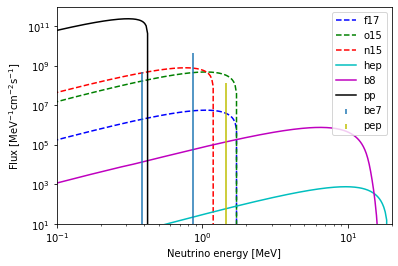

In [8]:
#solar neutrino spectrum, 
f17NDist = SolarNDist("f17",0.0005912e10)
o15NDist = SolarNDist("o15",0.05031e10)
n13NDist = SolarNDist("n13",0.05712e10)
hepNDist = SolarNDist("hepspectrum",0.000000788e10)
b8NDist = SolarNDist("b8spectrum",0.0005822e10)
be7_384NDist = SolarNDist("be7_384",0.4857e10*0.103)
be7_861NDist = SolarNDist("be7_861",0.4857e10*0.897)
ppNDist = SolarNDist("pp",5.938e10)

Ev_MeV=Ev*keV/MeV

plt.plot(Ev_MeV,f17NDist.dist(Ev_MeV),label='f17',linestyle='--',color='b')
plt.plot(Ev_MeV,o15NDist.dist(Ev_MeV),label='o15',linestyle='--',color='g')
plt.plot(Ev_MeV,n13NDist.dist(Ev_MeV),label='n15',linestyle='--',color='r')
plt.plot(Ev_MeV,hepNDist.dist(Ev_MeV),label='hep',color='c')
plt.plot(Ev_MeV,b8NDist.dist(Ev_MeV),label='b8',color='m')
plt.stem([384.3/1e3,861.8/1e3],np.array([0.103,0.897])*0.4857e10,label='be7',markerfmt=' ',basefmt=" ")
plt.stem(1442/1e3,0.01401e10,'y',label='pep', markerfmt=' ',basefmt=" ")
plt.plot(Ev_MeV,ppNDist.dist(Ev_MeV),label='pp',color='k')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(1e-1,20)
plt.ylim(10, 1e12)
plt.xlabel(r"Neutrino energy [MeV]")
plt.ylabel(r"Flux [MeV$^{-1}$cm$^{-2}$s$^{-1}$]")

/var/folders/38/lc2tk_jj1jx2qmw14bccxk740000gn/T/ipykernel_86517/2238697221.py:25: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(1442,0.01401e10*24*3600,'y',label='pep', markerfmt=' ',basefmt=" ")


Text(0, 0.5, 'Flux [$cm$^{-2}$d$^{-1}$keV$^{-1}]')

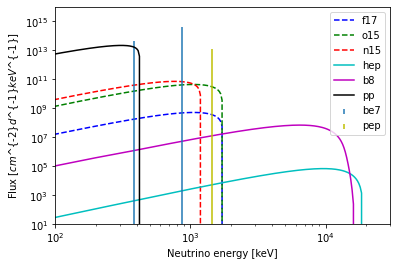

In [9]:
f17NDist = SolarNDist("f17",0.0005912e10)
o15NDist = SolarNDist("o15",0.05031e10)
n13NDist = SolarNDist("n13",0.05712e10)
hepNDist = SolarNDist("hepspectrum",0.000000788e10)
b8NDist = SolarNDist("b8spectrum",0.0005822e10)
be7_384NDist = SolarNDist("be7_384",0.4857e10*0.103)
be7_861NDist = SolarNDist("be7_861",0.4857e10*0.897)
ppNDist = SolarNDist("pp",5.938e10)

f17flux=f17NDist.dist(Ev_MeV)/1e3*24*3600
o15flux=o15NDist.dist(Ev_MeV)/1e3*24*3600
n13flux=n13NDist.dist(Ev_MeV)/1e3*24*3600
hepflux=hepNDist.dist(Ev_MeV)/1e3*24*3600
b8flux=b8NDist.dist(Ev_MeV)/1e3*24*3600
ppflux=ppNDist.dist(Ev_MeV)/1e3*24*3600

total_continuous_flux=f17flux+o15flux+n13flux+hepflux+b8flux+ppflux

plt.plot(Ev,f17flux,label='f17',linestyle='--',color='b')
plt.plot(Ev,o15flux,label='o15',linestyle='--',color='g')
plt.plot(Ev,n13flux,label='n15',linestyle='--',color='r')
plt.plot(Ev,hepflux,label='hep',color='c')
plt.plot(Ev,b8flux,label='b8',color='m')
plt.stem([384.3,861.8],np.array([0.103,0.897])*0.4857e10*24*3600,label='be7',markerfmt=' ',basefmt=" ")
plt.stem(1442,0.01401e10*24*3600,'y',label='pep', markerfmt=' ',basefmt=" ")
plt.plot(Ev,ppflux,label='pp',color='k')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlim(1e2,3e4)
plt.ylim(10, 1e16)
plt.xlabel(r"Neutrino energy [keV]")
plt.ylabel(r"Flux [$cm$^{-2}$d$^{-1}$keV$^{-1}]")

Text(0, 0.5, 'Counts [kg$^{-1}$d$^{-1}$keV$^{-1}$]')

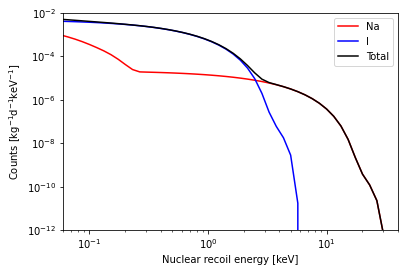

In [10]:
##without Be7 and PEP
def solarContinuous(Ev):
    Ev_MeV=Ev/MeV
    Ev_eV=Ev*keV
    f17flux=f17NDist.dist(Ev_MeV)/MeV*24*3600
    o15flux=o15NDist.dist(Ev_MeV)/MeV*24*3600
    n13flux=n13NDist.dist(Ev_MeV)/MeV*24*3600
    hepflux=hepNDist.dist(Ev_MeV)/MeV*24*3600
    b8flux=b8NDist.dist(Ev_MeV)/MeV*24*3600
    ppflux=ppNDist.dist(Ev_MeV)/MeV*24*3600
    return f17flux+o15flux+n13flux+hepflux+b8flux+ppflux
    
def integrand(Ev,ER,Target):
    return Target.N_T() * Model.Sig(Target, Ev, ER) * solarContinuous(Ev)

def sum_disc(ER,Target):
    if Model.Emin(Target,ER)<384.3:
        be7_384rate=Target.N_T() * Model.Sig(Target, 384.3, ER) * 0.103*0.4857e10*24*3600
    else:
        be7_384rate=0
    if Model.Emin(Target,ER)<861.8:    
        be7_861rate=Target.N_T() * Model.Sig(Target, 861.8, ER) * 0.897*0.4857e10*24*3600
    else:
        be7_861rate=0
    if Model.Emin(Target,ER)<1442:
        peprate=Target.N_T() * Model.Sig(Target, 1442, ER) * 0.01401e10*24*3600*24*3600
    else:
        peprate = 0
    return be7_384rate+be7_861rate+peprate

#integral = np.array([integrate.quad(lambda Evl:integrand(Evl,ERi,T[0]),Model.Emin(T[0],ERi),max(Ev),limit=int(1E8))[0] for ERi in ER])
#integral_Na = np.array([np.trapz(integrand(Ev_eV[Ev_eV>Model.Emin(T[0],ERi)],ERi,T[0]),Ev_eV[Ev_eV>Model.Emin(T[0],ERi)]) for ERi in ER_eV])
integral_Na = np.array([np.trapz(integrand(Ev_eV[Ev_eV>Model.Emin(T[0],ERi)],ERi,T[0]),Ev_eV[Ev_eV>Model.Emin(T[0],ERi)])*T[0].mT()/Det.DetMass() for ERi in ER_eV])
integral_I = np.array([np.trapz(integrand(Ev_eV[Ev_eV>Model.Emin(T[1],ERi)],ERi,T[1]),Ev_eV[Ev_eV>Model.Emin(T[1],ERi)])*T[1].mT()/Det.DetMass() for ERi in ER_eV])
#print(integral)
plt.plot(ER,integral_Na*keV,label='Na',color='r')
plt.plot(ER,integral_I*keV,label='I',color='blue')
plt.plot(ER,integral_Na*keV+integral_I*keV,label='Total',color='black')
#plt.plot(ER,np.array([sum_disc(ERi,T[0]) for ERi in ER]),label='Na')
#plt.plot(ER,np.array([sum_disc(ERi,T[1]) for ERi in ER]),label='I')
#plt.plot(ER,np.array([sum_disc(ERi,T[0]) for ERi in ER])+np.array([sum_disc(ERi,T[1]) for ERi in ER]),label='Total')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(6e-2,4e1)
plt.ylim(1e-12, 1e-2)
plt.xlabel(r"Nuclear recoil energy [keV]")
plt.ylabel(r"Counts [kg$^{-1}$d$^{-1}$keV$^{-1}$]")

Text(0, 0.5, 'Counts [kg$^{-1}$d$^{-1}$keV$^{-1}$]')

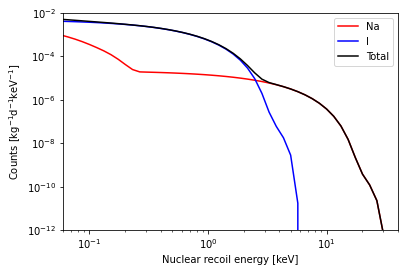

In [11]:
##with Be7 and PEP
#integral = np.array([integrate.quad(lambda Evl:integrand(Evl,ERi,T[0]),Model.Emin(T[0],ERi),max(Ev),limit=int(1E8))[0] for ERi in ER])
integral_Na = np.array([(np.trapz(integrand(Ev_eV[Ev_eV>Model.Emin(T[0],ERi)],ERi,T[0]),Ev_eV[Ev_eV>Model.Emin(T[0],ERi)])+sum_disc(ERi,T[0]))*T[0].mT()/Det.DetMass() for ERi in ER_eV])
integral_I = np.array([(np.trapz(integrand(Ev_eV[Ev_eV>Model.Emin(T[1],ERi)],ERi,T[1]),Ev_eV[Ev_eV>Model.Emin(T[1],ERi)])+sum_disc(ERi,T[1]))*T[1].mT()/Det.DetMass() for ERi in ER_eV])
#print(integral)
plt.plot(ER,integral_Na*keV,label='Na',color='r')
plt.plot(ER,integral_I*keV,label='I',color='blue')
plt.plot(ER,(integral_Na*keV+integral_I*keV),label='Total',color='black')
#plt.plot(ER,np.array([sum_disc(ERi,T[0]) for ERi in ER]),label='Na')
#plt.plot(ER,np.array([sum_disc(ERi,T[1]) for ERi in ER]),label='I')
#plt.plot(ER,np.array([sum_disc(ERi,T[0]) for ERi in ER])+np.array([sum_disc(ERi,T[1]) for ERi in ER]),label='Total')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(6e-2,4e1)
plt.ylim(1e-12, 1e-2)
plt.xlabel(r"Nuclear recoil energy [keV]")
plt.ylabel(r"Counts [kg$^{-1}$d$^{-1}$keV$^{-1}$]")

Text(0, 0.5, 'Counts [kg$^{-1}$d$^{-1}$keV$^{-1}$]')

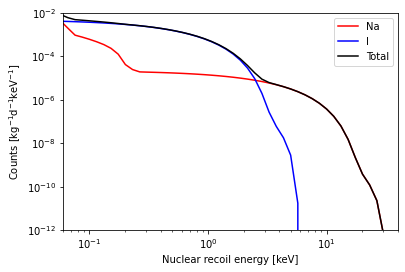

In [12]:
## using dirac delta function for Be7 and PEP
from sympy import DiracDelta, symbols, integrate

x = symbols('x')

def solarContinuous(Ev):
    Ev_MeV=Ev/MeV
    Ev_eV=Ev*keV
    f17flux=f17NDist.dist(Ev_MeV)/MeV*24*3600
    o15flux=o15NDist.dist(Ev_MeV)/MeV*24*3600
    n13flux=n13NDist.dist(Ev_MeV)/MeV*24*3600
    hepflux=hepNDist.dist(Ev_MeV)/MeV*24*3600
    b8flux=b8NDist.dist(Ev_MeV)/MeV*24*3600
    ppflux=ppNDist.dist(Ev_MeV)/MeV*24*3600
    return f17flux+o15flux+n13flux+hepflux+b8flux+ppflux

def sum_disc(Ev):
    be7flux = DiracDelta(x-384.3e3)* 0.103*0.4857e10*24*3600 + DiracDelta(x-861.8e3)* 0.897*0.4857e10*24*3600
    pepflux = DiracDelta(x-1442e3)*0.01401e10*24*3600
    return be7flux+pepflux
    
def integrand_dirac(Ev,ER,Target,source):
    if source == 'continuous':
        return Target.N_T() * Model.Sig(Target, Ev, ER) * solarContinuous(Ev)
    if source == 'discrete':
        return Target.N_T() * Model.Sig(Target, Ev, ER) * sum_disc(Ev)
    else:
        return 0


#integral = np.array([integrate.quad(lambda Evl:integrand(Evl,ERi,T[0]),Model.Emin(T[0],ERi),max(Ev),limit=int(1E8))[0] for ERi in ER])
#integral_Na = np.array([np.trapz(integrand(Ev_eV[Ev_eV>Model.Emin(T[0],ERi)],ERi,T[0]),Ev_eV[Ev_eV>Model.Emin(T[0],ERi)]) for ERi in ER_eV])
integral_Na = np.array([(np.trapz(integrand_dirac(Ev_eV[Ev_eV>Model.Emin(T[0],ERi)],ERi,T[0],'continuous'),Ev_eV[Ev_eV>Model.Emin(T[0],ERi)]) + integrate(integrand_dirac(x,ERi,T[0],'discrete'),(x,Model.Emin(T[0],ERi),float('inf'))))*T[0].mT()/Det.DetMass() for ERi in ER_eV])
integral_I = np.array([(np.trapz(integrand_dirac(Ev_eV[Ev_eV>Model.Emin(T[1],ERi)],ERi,T[1],'continuous'),Ev_eV[Ev_eV>Model.Emin(T[1],ERi)]) + integrate(integrand_dirac(x,ERi,T[1],'discrete'),(x,Model.Emin(T[1],ERi),float('inf'))))*T[1].mT()/Det.DetMass() for ERi in ER_eV])
#print(integral)
plt.plot(ER,integral_Na*keV,label='Na',color='r')
plt.plot(ER,integral_I*keV,label='I',color='blue')
plt.plot(ER,integral_Na*keV+integral_I*keV,label='Total',color='black')
#plt.plot(ER,np.array([sum_disc(ERi,T[0]) for ERi in ER]),label='Na')
#plt.plot(ER,np.array([sum_disc(ERi,T[1]) for ERi in ER]),label='I')
#plt.plot(ER,np.array([sum_disc(ERi,T[0]) for ERi in ER])+np.array([sum_disc(ERi,T[1]) for ERi in ER]),label='Total')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlim(6e-2,4e1)
plt.ylim(1e-12, 1e-2)
plt.xlabel(r"Nuclear recoil energy [keV]")
plt.ylabel(r"Counts [kg$^{-1}$d$^{-1}$keV$^{-1}$]")